<div style="border: 2px solid white; padding: 10px;">
    <h2 style='text-align: center; margin-top:5px'><u>Precision, Recall, and F-Measure in Confusion Matrix.</u></h2>
    <pre style='line-height: 2'>
The global aim of these calculations is pretty straightforward: 
evaluate the performance of a classification model by measuring 
its capacity of <mark>classifying data</mark> correctly.
    </pre>
    <hr></hr>
        <h4 style='text-align: center; margin-top:5px'><u>True Positive, False Positive, True Negative, False Negative:</u></h4>
    <pre style='line-height: 2'>
    These, aka <mark>TP, FP, TN, FN,</mark> are the actual result of our classifying model.
    It's based on two class :
    • <mark>The positive class</mark>, usually the smallest one (here Jedi, with 49 occurence)
    • <mark>The negative class</mark>, usually the biggest one (here Sith, with 51 occurence).
    The result will be classified depending on the class we are watching from.
    </pre>
    <pre style='line-height: 1.5'>
    <b>From the Jedi Class perspective</b> (Jedi = positive, Sith = Negative):
            Truth | Prediction
        0   Jedi  | Jedi            <---- True positive (TP)
        1   Jedi  | Sith            <---- False negative (FN)
        2   Sith  | Sith            <---- True negative (TN)
        3   Sith  | Jedi            <---- False positive (FP)
    </pre>
    <pre style='line-height: 1.5'>
    <b>From the Sith Class perspective</b> (Sith = positive, Jedi = Negative): 
            Truth | Prediction
        0   Sith  | Sith            <---- True positive (TP)
        1   Sith  | Jedi            <---- False negative (FN)
        2   Jedi  | Jedi            <---- True negative (TN)
        3   Jedi  | Sith            <---- False positive (FP)
    </pre>
    <hr></hr>
        <h4 style='text-align: center; margin-top:5px'><u>Calculations:</u></h4>
    <ul>
        <li>
            <h5> Precision:</h5>
            <code>precision = truePositive / (truePositive + falsePositive)</code>
            <pre style='line-height: 2'>
Precision aims to measure the ratio of correct <mark>positive</mark> prediction made,
therefore, it focus on the class we are watching from, the positive class.
It does not take into account the negative prediction.
In our case, precision measures <mark> how many Jedi were actually Jedi </mark> 
            </pre>
        </li>
        <li>
            <h5> Recall:</h5>
            <code>recall = truePositive / (truePositive + falseNegative)</code>
            <pre style='line-height: 2'>
Recall aims to measure the proportion of actual positive elements
that the model correctly identified as positive.
            </pre>
        </li>
        <pre style='line-height: 2'>
    Precision and Recall may seem redundant at first sight (for me they did).
    So let's clarify:
    There are 4 cats (positive class) and 6 dogs (negative class) in the room.
    The model identifies 2 cats as cats, and the rest as dogs.
    <code>precision = 2 / (2 + 0) </code>
    <code>precision = 1.0</code>
    The model identified 2 cat as cats and he was right. 
    No dogs were identified as cat.
    <code>recall = 2 / (2 + 2)</code>
    <code>recall = 0.5</code> 
    The model missed  2 cats.
        </pre>
        <li>
            <h5> F-Measure:</h5>
            <code>F1 = (2 * precision * recall) / (precision + recall)</code>
            <pre style='line-height: 2'>
As seen just above, alone, precision and recall are not meaningfull.
We can have a perfect precision with a terrible recall, and vice versa.
            </pre>
            <pre style='line-height: 2'>
The F-Measure provides a way of <mark>combining</mark> both precision and recall
<mark>into a single score.</mark>
The F-Measure we will use in this exercise is the <mark>F1-Score</mark>, it's the default calculation,
giving the <mark>same weight</mark> to precision and recall.
Other types of F-Score exists and are used to give <mark>greater weight</mark> either to precision or recall.
            </pre>
        </li>
        <li>
            <h5> Accuracy:</h5>
            <code>(truePositive + trueNegative) /  (totalPositive + totalNegative)</code>
            <pre style='line-height: 2'>
This is the most basic calculation. 
We just take all the correct predictions and divide it by the total number of elements.
            </pre>
        </li>


In [98]:
from matplotlib import pyplot as plt

with open('../truth.txt', 'r') as f:
    truth = f.read().splitlines()
with open('../predictions.txt', 'r') as f:
    predictions = f.read().splitlines()


    ################ INDEXING TRUE POSITIVE/FALSE POSITIVE/... ##################

matrix = [
    [0, 0], # Jedi as positive - true/false
    [0, 0]  # Sith as positive - false/true
]
types = ['Jedi', 'Sith']
for t, p in zip(truth, predictions):
    matrix[types.index(t)][types.index(p)] += 1

tpS_tnJ = matrix[1][1] # variable tpS_tnJ == true positive Sith, true negative Jedi.
tnS_tpJ = matrix[0][0]
fnS_fpJ = matrix[1][0]
fpS_fnJ = matrix[0][1]

    #################### CALCULATING PRECISION/RECALL/F1-SCORE ###################

precisionJ = tnS_tpJ / (tnS_tpJ + fnS_fpJ)
precisionS = tpS_tnJ / (tpS_tnJ + fpS_fnJ)
recallJ = tnS_tpJ / (tnS_tpJ + fpS_fnJ)
recallS = tpS_tnJ / (tpS_tnJ + fnS_fpJ)
totalJ = tnS_tpJ + fpS_fnJ
totalS = tpS_tnJ + fnS_fpJ
accuracy = (tpS_tnJ + tnS_tpJ) / (totalJ + totalS)
fOneJ = (2 * precisionJ * recallJ) / (precisionJ + recallJ)
fOneS = (2 * precisionS * recallS) / (precisionS + recallS)
    ############################## DISPLAYING INFO #################################

header = "{:<12} {:<12} {:<10} {:<12} {:<6}\n".format(
        "", "precision", "recall", "f1-Score", "Total")
rowJ = "{:<16} {:<9} {:<12} {:<11} {:<6}\n".format(
    "Jedi", f'{precisionJ:.2f}', f'{recallJ:.2f}', f'{fOneJ:.2f}', int(totalJ)
)
rowS = "{:<16} {:<9} {:<12} {:<11} {:<6}\n".format(
    "Sith", f'{precisionS:.2f}', f'{recallS:.2f}', f'{fOneS:.2f}', int(totalS)
)
rowAcc = "\n{:<0} {:<31} {:<10} {:<6}\n".format(
    "accuracy", "", f'{accuracy:.2f}', int(totalS + totalJ)
)

print(header, rowJ, rowS, rowAcc, '\n', matrix)

             precision    recall     f1-Score     Total 
 Jedi             0.45      0.51         0.48        49    
 Sith             0.47      0.41         0.44        51    
 
accuracy                                 0.46       100   
 
 [[25, 24], [30, 21]]


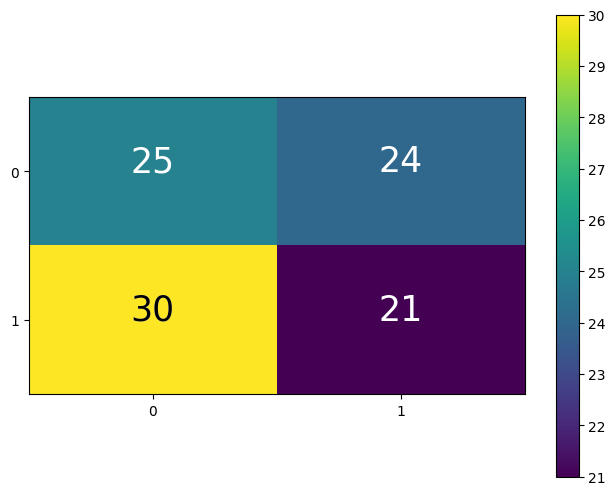

In [141]:
fig, ax = plt.subplots(figsize=(8, 4))
cax=ax.matshow(matrix)
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        ax.text(i, j, matrix[j][i], ha='center', size=25, color='white')
ax.text(0, 1, matrix[1][0], ha='center', size=25, color='black')
ax.set_aspect(0.6)
ax.xaxis.set_ticks_position('bottom')
fig.colorbar(cax, shrink=1.5)
plt.show()